# DTM JAVOB VARAQALARINI TEKSHIRUVCHI DASTUR

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

Abituriyent tamonidan belgilangan javoblar varaqasi



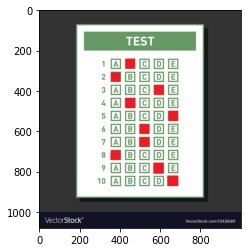

In [71]:
#Belgilangan varaqani o'qitish
image = cv2.imread(r"belgilangan.jpg")
im = cv2.imread(r"dtm.png", cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Abituriyent tamonidan belgilangan javoblar varaqasi\n")
plt.imshow(image)
plt.show()

In [72]:
#To'g'ri javoblar generatori
def randletter(x, y):
    return chr(random.randint(ord(x), ord(y)))

In [83]:
#To'g'ri javoblar
#w = [randletter('A', 'E') for i in range(10)]
w = ['B', 'A', 'D', 'B', 'E', 'C', 'C', 'A', 'D', 'E']
print("Aslida to'g'ri javoblar\n")
print(w)

Aslida to'g'ri javoblar

['B', 'A', 'D', 'B', 'E', 'C', 'C', 'A', 'D', 'E']


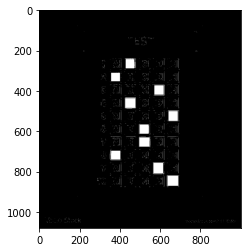

In [74]:
#maska uchun qizil rang tanlab olindi
red = np.array([230, 0, 0])
red2 = np.array([255, 250, 250])
mask = cv2.inRange(image, red, red2)
# mask = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
plt.imshow(mask, cmap='gray')

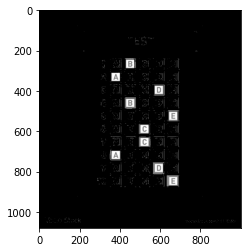

In [75]:
#maskani ishlatish
rasm = np.copy(im)
# rasm = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
rasm[mask == 0] = [0]
# rasm = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
plt.imshow(rasm, cmap='gray')

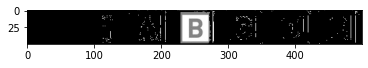

In [76]:
#rasmni gorizontal bo'laklash
# image = cv2.imread(r"C:\Users\Abduraxim Jabborov\Desktop\belgilangan.jpg", cv2.IMREAD_GRAYSCALE)
rasmlar = []
for i in range(240, 870, 64):
    rasmlar.append(rasm[i:i+50, 200:700])
plt.imshow(rasmlar[0], cmap='gray')

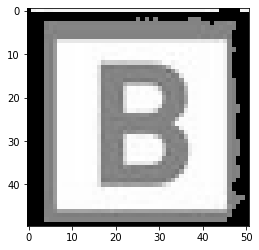

In [77]:
#rasmni vertikal bo'laklash
rasm2 = []
for k in range(10):
  for i in range(154, 490, 71):
      rasm2.append(rasmlar[k][:, i:i+51])
plt.imshow(rasm2[1], cmap='gray')

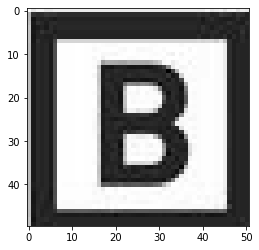

In [78]:
#Bu standart harf sifatida olinadi va belgilangan bilan solishtiriladi
img = cv2.imread(r"dtm.png", cv2.IMREAD_GRAYSCALE)
rasmlar1 = []
for i in range(240, 870, 64):
    rasmlar1.append(img[i:i+50, 200:700])
# plt.imshow(rasmlar[0])
rasm3 = []
for i in range(154, 490, 71):
    rasm3.append(rasmlar1[0][:, i:i+51])
d ={'A': 0,
    'B': 0,
    'C': 0,
    'D': 0,
    'E': 0}
k=0
for i in d.keys():
  d[i] = rasm3[k]
  k = k + 1
plt.imshow(d['B'], cmap='gray')

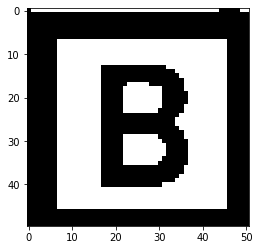

In [79]:
qo = []
for i in d.values():
  a, b = cv2.threshold(i, 240,255, cv2.THRESH_BINARY)
  qo.append(b)
qo1 = []
for i in rasm2:
  a, b = cv2.threshold(i, 180, 255, cv2.THRESH_BINARY)
  qo1.append(b)
k = 0
for i in d.keys():
  d[i] = qo[k]
  k = k+1
plt.imshow(qo1[1], cmap='gray')

In [80]:
def farq(qo, qo1):
  difference = cv2.subtract(qo, qo1)
  return cv2.countNonZero(difference)
def GetKey(val):
   for key, value in dictA.items():
      if val == value:
         return key


In [81]:
a = []
k = 0
for i in range(10):
  for j in d.keys():
    print(farq(d[j], qo1[k]), end=' ')
    if farq(d[j], qo1[k]) <600:
      a.append(j)
      #print(farq(d[j], qo1[k]), end=' ')
    k = k+1
  print()
print(a)

1080 4 1097 1026 1058 
48 988 1090 1000 1042 
1090 983 1088 66 1043 
1101 82 1094 1019 1051 
1097 1001 1106 1014 153 
1103 1003 149 1034 1047 
1071 995 204 993 1038 
201 1010 1109 1023 1063 
1110 1012 1114 266 1062 
1118 1013 1110 1017 321 
['B', 'A', 'D', 'B', 'E', 'C', 'C', 'A', 'D', 'E']


In [84]:
k = 0
for i in range(10):
  if a[i] == w[i]:
    print(f"{i+1} -javob to'g'ri   ","\N{grinning face}")
    k = k+1
  else:
    print(f"{i+1} -javob noto'g'ri ", "\N{anguished face}")
# print(k)
print(f"to'g'ri javoblar soni {k} ta. Natija {k*10} % ")


1 -javob to'g'ri    😀
2 -javob to'g'ri    😀
3 -javob to'g'ri    😀
4 -javob to'g'ri    😀
5 -javob to'g'ri    😀
6 -javob to'g'ri    😀
7 -javob to'g'ri    😀
8 -javob to'g'ri    😀
9 -javob to'g'ri    😀
10 -javob to'g'ri    😀
to'g'ri javoblar soni 10 ta. Natija 100 % 
